ДЗ №1 

Уманец Екатерина 

# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
data = pd.read_csv("adult.csv",header=None,names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"])
data.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [54]:
pd.DataFrame(data.groupby("sex")[["sex"]].count())

,sex
sex,
Female,10771
Male,21790


### Вопрос 2
Каков средний возраст мужчин?


In [55]:
print("Средний возраст мужчин",round(pd.DataFrame(data.groupby("sex")[["age"]].mean()).loc[" Male"].values[0],2), "лет")

Средний возраст мужчин 39.43 лет


### Вопрос 3
Какова доля граждан США?

In [59]:
a = data[data['native-country']==' United-States']['native-country'].count()
b = data[data['native-country']!=' ?']['native-country'].count()
print(round(a/b,2))

#print("доля граждан США = ", round(data[data['native-country']==' United-States']['native-country'].count()/data['native-country'].count(),3))

0.91


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

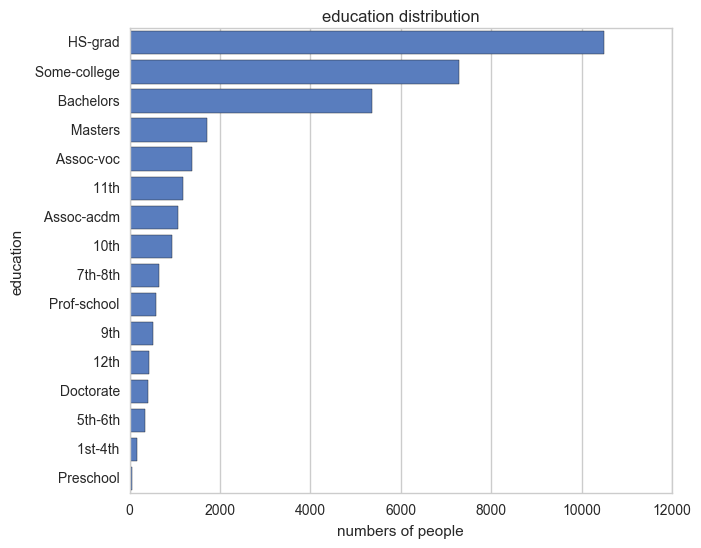

In [73]:
data_educ = data.groupby(["education"])["education"].count().sort_values(ascending =False)
f,ax = plt.subplots(figsize=(7, 6))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(y=data_educ.index, x= data_educ.values,ax=ax,color="b")
ax.set(xlabel="numbers of people",title="education distribution")
plt.show()

Не нармирую, так как не просят  :) 

Строчка для нормированного отображения графика

sns.barplot(y=data_educ.index, x= data_educ.values/data_educ.sum()*100,ax=ax,color="b")


### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [43]:
# Впишите решение сюда
print("mean = ", round(data[data["marital-status"]==" Divorced"]["fnlwgt"].mean(),2))
print("standard deviation = ", round(data[data["marital-status"]==" Divorced"]["fnlwgt"].std(),2))


mean =  185802.79
standard deviation =  105646.79


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [74]:
# Впишите решение сюда (высшее образование: Bachelors Masters Doctorate)

data_4 = pd.DataFrame(data[data["50K"]==' >50K'].groupby("education")["education"].count())
data_4


,education
education,
10th,62
11th,60
12th,33
1st-4th,6
5th-6th,16
7th-8th,40
9th,27
Assoc-acdm,265
Assoc-voc,361


In [75]:
print("Доля людей, которые зарабатывают >50K = ",round((2221 +959 +306)/pd.DataFrame(data_4)["education"].sum(),2) )
print("Следователно, ответ НЕ Правда")

Доля людей, которые зарабатывают >50K =  0.44
Следователно, ответ НЕ Правда


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [10]:
# Впишите решение сюда
print("максимальный возраст")
pd.DataFrame(data.groupby(["sex",'race'])["age"].max())

максимальный возраст


age
sex     race                    
 Female  Amer-Indian-Eskimo   80
         Asian-Pac-Islander   75
         Black                90
         Other                74
         White                90
 Male    Amer-Indian-Eskimo   82
         Asian-Pac-Islander   90
         Black                90
         Other                77
         White                90

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [45]:
# Впишите решение сюда
#set(data["native-country"])
print("Countries:")
set(data[data['occupation']==" Farming-fishing"]["native-country"])

Countries:


{' ?',
 ' Cambodia',
 ' Canada',
 ' Cuba',
 ' El-Salvador',
 ' England',
 ' France',
 ' Germany',
 ' Guatemala',
 ' Hong',
 ' Ireland',
 ' Italy',
 ' Japan',
 ' Mexico',
 ' Philippines',
 ' Poland',
 ' Portugal',
 ' Puerto-Rico',
 ' United-States',
 ' Vietnam',
 ' Yugoslavia'}

То есть есть люди, у которых страна не известна ( " ?")

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [12]:
data_bach_master = data.loc[(data['education']==" Bachelors")  | (data['education']==" Masters")]
data_bach_master.groupby(["sex","education"])["education"].count()

sex      education 
 Female   Bachelors    1619
          Masters       536
 Male     Bachelors    3736
          Masters      1187
Name: education, dtype: int64

In [13]:
print('Male_bach_to_masters = ', round(3736/1187,2))
print('Female_bach_to_masters = ', round(1619/536,2))
print("Отношение = ",round((3736/1187)/(1619/536),2))
print('Соотношение мужчин бакалавров к мужчинам магистров больше,чем тоже соотношение для женщин')

Male_bach_to_masters =  3.15
Female_bach_to_masters =  3.02
Отношение =  1.04
Соотношение мужчин бакалавров к мужчинам магистров больше,чем тоже соотношение для женщин


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [16]:
# Впишите решение сюда
print('max hours-per-week = ' , data['hours-per-week'].max())
print('number of people = ',data[data['hours-per-week']==99].shape[0])
print()
print("распределение людей с зп >50K и <=50K")
data[data['hours-per-week']==99].groupby(["50K"])["50K"].count()

max hours-per-week =  99
number of people =  85

распределение людей с зп >50K и <=50K


50K
 <=50K    60
 >50K     25
Name: 50K, dtype: int64